## Importeren van de data

Als eerste moeten we de data importen. We openen daarvoor de csv file en zetten de data in verschillende variabelen:

* columns is een dictionary die de naam van de kolom vertaalt naar de index voor de data array
* rows is een list van elke rij die als een list is opgeslagen
* data is een dictionary van de index van de kolom naar een lijst van data voor die kolom

In [24]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

# keuze uit gemeente
placeHolder = 'utrecht.csv'
filename = 'sluis.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1
    print(f'Processed {line_count} lines.')

Processed 226 lines.


Hier printen we de namen van de kolommen zodat je kan zien welke data er in het bestand zit.

In [25]:
print(columns)

{'ï»¿"ID"': 0, 'RegioS': 1, 'Perioden': 2, 'BevolkingAanHetBeginVanDePeriode_1': 3, 'LevendGeborenKinderen_2': 4, 'Overledenen_3': 5, 'TotaleVestiging_4': 6, 'VestigingVanuitEenAndereGemeente_5': 7, 'Immigratie_6': 8, 'TotaalVertrekInclAdmCorrecties_7': 9, 'VertrekNaarAndereGemeente_8': 10, 'EmigratieInclusiefAdmCorrecties_9': 11, 'OverigeCorrecties_10': 12, 'Bevolkingsgroei_11': 13, 'BevolkingsgroeiRelatief_12': 14, 'BevolkingsgroeiSinds1Januari_13': 15, 'BevolkingsgroeiSinds1JanuariRela_14': 16, 'BevolkingAanHetEindeVanDePeriode_15': 17}


## Verwerken van de data

Hier printen we de data voor alle maanden van het laatste jaar van het vertrek uit de gemeente.

In [26]:
print(data[columns['VertrekNaarAndereGemeente_8']][-13:-1])

[37, 25, 43, 41, 69, 62, 53, 46, 33, 64, 37, 53]


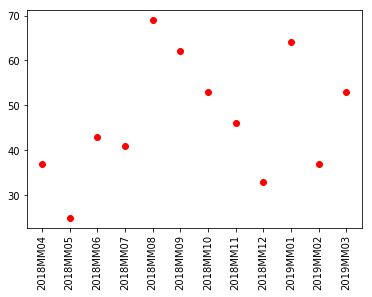

In [27]:
plt.plot( data[columns['Perioden']][-13:-1], data[columns['VertrekNaarAndereGemeente_8']][-13:-1], 'ro')
plt.xticks(rotation=90)
plt.show()

Functies voor vinden gemiddelde, mediaan en standaard deviatie.

In [28]:
def findMean(list):
    total = 0
    size = 0
    for i in list:
        total += i
        size += 1
    return total / size

In [29]:
def findMedian(list):
    list.sort()
    if len(list) % 2 != 0:
        return list[int((len(list)/2) - 1.5)]
    else:
        return list[int((((len(list)/2)) + ((len(list)/2)-1)) / 2)]

In [30]:
def findVarians(list):
    mean = findMean(list)
    total = 0
    count = 0
    for i in list:
        total += (i - mean) * (i - mean)
        count += 1
    return total / count

In [31]:
def findStandardDeviation(list):
    varians = findVarians(list)
    return math.sqrt(varians)

In [32]:
def printInfo(info):
    print("Gemiddelde: " + str(findMean(info)))
    print("mediaan: " + str(findMedian(info)))
    print("standaard deviatie: " + str(findStandardDeviation(info)))

In [33]:
printInfo(data[columns['VertrekNaarAndereGemeente_8']][-13:-1])

Gemiddelde: 46.916666666666664
mediaan: 43
standaard deviatie: 12.919354559041338


Overledenen_3:


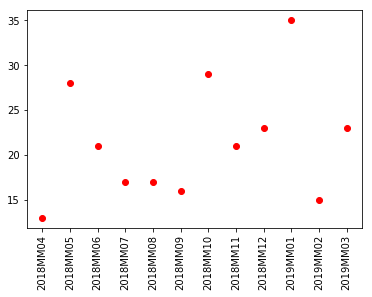

Gemiddelde: 21.5
mediaan: 21
standaard deviatie: 6.264982043070834


In [34]:
print("Overledenen_3:")
plt.plot(data[columns['Perioden']][-13:-1], data[columns['Overledenen_3']][-13:-1], 'ro')
plt.xticks(rotation=90)
plt.show()
printInfo(data[columns['Overledenen_3']][-13:-1])

BevolkingAanHetEindeVanDePeriode_15:


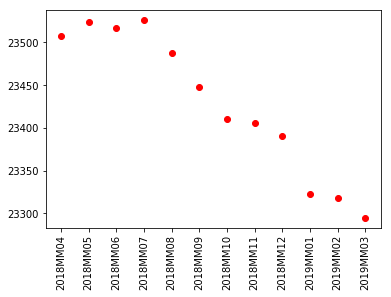

Gemiddelde: 23429.333333333332
mediaan: 23410
standaard deviatie: 81.56422145905778


In [35]:
print("BevolkingAanHetEindeVanDePeriode_15:")
plt.plot(data[columns['Perioden']][-13:-1], data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1], 'ro')
plt.xticks(rotation=90)
plt.show()
printInfo(data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1])

VestigingVanuitEenAndereGemeente_5:


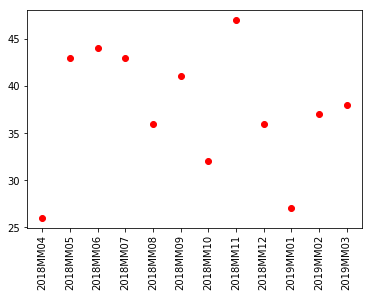

Gemiddelde: 37.5
mediaan: 37
standaard deviatie: 6.34428877022476


In [36]:
print("VestigingVanuitEenAndereGemeente_5:")
plt.plot(data[columns['Perioden']][-13:-1], data[columns['VestigingVanuitEenAndereGemeente_5']][-13:-1], 'ro')
plt.xticks(rotation=90)
plt.show()
printInfo(data[columns['VestigingVanuitEenAndereGemeente_5']][-13:-1])

We gaan nu een trendlijn maken voor de informatie over bevolking van de gemeente aan het einde van de Periode. Dit ga ik doen met behul van liniare regressie.

Daarvoor heb ik een aantal formules nodig.

De formule voor de lijn:

\begin{equation}
y = mx+b
\end{equation}

We weten de x maar om y te berekenen moeten we ook de m en de b weten. Omdaar achter te komen gebruiken we de onderstaande formules.

Formule voor mean van x:

\begin{equation}
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

Formule voor mean van y:

\begin{equation}
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
\end{equation}

Formule voor mean van xy:

\begin{equation}
\bar{xy} = \frac{1}{n}\sum_{i=1}^n x_iy_i
\end{equation}

Formule voor mean x^2:

\begin{equation}
\bar{x}^2 = \frac{\sum\limits_{i=1}^{n}x_i^2} {n}
\end{equation}

Formule voor m:

\begin{equation}
m = \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}^2}
\end{equation}

Formule voor b:

\begin{equation}
b=\bar{y}-m\bar{x}
\end{equation}

Nu we de formules weten die we nodig hebben weten. Kunnen we python functies maken om die te bereken. Hierbij gaan we ervanuit dat elke x een y waarde heeft. De sommige funcies hebben we al gemaakt. We hebben nog 4 functies nodig, die voor meanXY,  meanX^2 m, b en y.

In [37]:
def getXList(list):
    x = []
    num = 1
    for i in list:
        x.append(num)
        num += 1
    return x

In [38]:
def findMeanSquerd(list):
    total = 0
    size = 0
    for i in list:
        total += i * i
        size += 1
    return total / size

In [39]:
def findMeanXY(listX, listY):
    total = 0
    size = 0
    for i in range(len(listX)):
        total += listX[i] * listY[i]
        size += 1
    return total / size  

In [40]:
def findM(listX, listY):
    meanX = findMean(listX)
    meanY = findMean(listY)
    meanXY = findMeanXY(listX, listY)
    meanXSquard = findMeanSquerd(listX)
    squerdMeanX = meanX * meanX 
    return ((meanX * meanY) - meanXY) / (squerdMeanX - meanXSquard)

In [41]:
def findB(listX, listY):
    meanX = findMean(listX)
    meanY = findMean(listY)
    m = findM(listX, listY)
    return meanY - (m * meanX)

In [42]:
def trendLine(listX, listY):
    y = []
    for i in range(len(listX)):
        y.append((findM(listX, listY) * listX[i]) + findB(listX, listY))
    return y

BevolkingAanHetEindeVanDePeriode_15
Met trendlijn:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[23507, 23524, 23517, 23526, 23487, 23448, 23410, 23406, 23391, 23323, 23318, 23295]


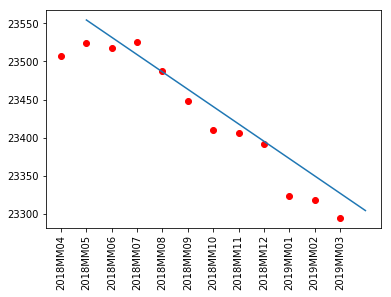

In [43]:
print("BevolkingAanHetEindeVanDePeriode_15\nMet trendlijn:")
xlist = getXList(data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1])
print(xlist)
print(data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1])
plt.plot(data[columns['Perioden']][-13:-1], data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1], 'ro')
plt.xticks(rotation=90)
trend = trendLine(xlist, data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1])
plt.plot(xlist, trend)
plt.show()

We hebben nu een trendline voor de data. Hieronder maak ik de trendline met behulp van numpy om te controleren of hij klopt.

BevolkingAanHetEindeVanDePeriode_15
Met trendlijn:


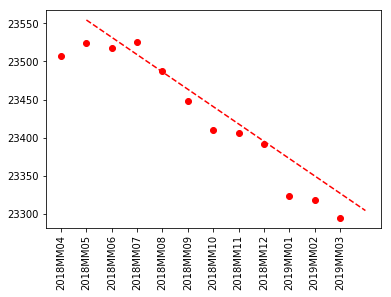

In [44]:
print("BevolkingAanHetEindeVanDePeriode_15\nMet trendlijn:")
xlist = getXList(data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1])
plt.plot(data[columns['Perioden']][-13:-1], data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1], 'ro')
plt.xticks(rotation=90)

z = np.polyfit(xlist, data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1], 1)
p = np.poly1d(z)
plt.plot(xlist,p(xlist),"r--")
plt.show()

Zo te zien is mijn trendlijn correct. Nu kunnen we de trendlijn gebruiken om te voorspellen hoeveel inwoners de gemeente heeft aan het einde van de volgende maand, die niet op de grafiek staat. Daarvoor maken we een nieuwe functie waar je de x meegeeft en de prognose voor de y terug krijgt.

In [45]:
def findY(x, listX, listY):
    y = (findM(listX, listY) * x) + findB(listX, listY)
    return y

Om de y voor april te krijgen moeten we x = 13 doen.

In [46]:
print("Verwacht aantal inwonders eind van de volgende maand:")
print(findY(13, xlist, data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1]))

Verwacht aantal inwonders eind van de volgende maand:
23281.606060606067


Nu kunnen we dus voorspellingen doen aan de hand van de gegeven data.